In [1]:
import pandas as pd
import numpy as np 
import matplotlib.cm
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
psp_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/phosphosite_for_pockets.csv")
psp_data

/tmp/ipykernel_20810/3773762598.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  psp_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/phosphosite_for_pockets.csv")


,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,DOMAIN,...,Ambiguous_Site,RES_NUM,PKA_ID,uniprotID,AA,res_number,pK,state,position,uniprot_id
0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,NaN,...,0,2,P31946_2,P31946,THR,2.0,NaN,undefined,2.0,P31946
1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,NaN,...,0,6,P31946_6,P31946,SER,6.0,NaN,undefined,6.0,P31946
2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,28.08,14-3-3,...,0,21,P31946_21,P31946,TYR,21.0,11.100927,protonated,21.0,P31946
3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,14-3-3,...,0,32,P31946_32,P31946,THR,32.0,NaN,undefined,32.0,P31946
4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,14-3-3,...,0,39,P31946_39,P31946,SER,39.0,NaN,undefined,39.0,P31946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,436140,ZHX1,ZHX1,Q9UKY1,8q24.13,S450-gl,14703720,human,98.10,NaN,...,0,450,Q9UKY1_450,Q9UKY1,SER,450.0,NaN,undefined,450.0,Q9UKY1
436008,436141,ZNF281,ZNF281,Q9Y2X9,1q32.1,S891-gl,14703723,human,96.91,NaN,...,0,891,Q9Y2X9_891,Q9Y2X9,SER,891.0,NaN,undefined,891.0,Q9Y2X9
436009,436142,ZNF609,ZNF609,O15014,15q22.31,S1196-gl,14703726,human,151.19,NaN,...,0,1196,O15014_1196,O15014,SER,1196.0,NaN,undefined,1196.0,O15014
436010,436143,ZYX,Zyxin,Q15942,7q34,S169-gl,1876610700,human,61.28,NaN,...,0,169,Q15942_169,Q15942,SER,169.0,NaN,undefined,169.0,Q15942


In [3]:
psp_data[psp_data['MOD_RSD'].str.contains("-m1")]

,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,DOMAIN,...,Ambiguous_Site,RES_NUM,PKA_ID,uniprotID,AA,res_number,pK,state,position,uniprot_id
405523,405648,YWHAB,14-3-3 beta,P31946,20q13.12,K51-m1,57981900,human,28.08,14-3-3,...,1,51,P31946_51,P31946,LYS,51.0,10.448943,protonated,51.0,P31946
405524,405649,YWHAE,14-3-3 epsilon,P62258,17p13.3,R4-m1,57732204,human,29.17,NaN,...,0,4,P62258_4,NaN,NaN,NaN,NaN,NaN,NaN,P62258
405525,405650,YWHAE,14-3-3 epsilon,P62258,17p13.3,R130-m1,57732200,human,29.17,14-3-3,...,0,130,P62258_130,NaN,NaN,NaN,NaN,NaN,NaN,P62258
405526,405651,YWHAE,14-3-3 epsilon,P62258,17p13.3,K153-m1,57981905,human,29.17,14-3-3,...,0,153,P62258_153,P62258,LYS,153.0,10.710706,protonated,153.0,P62258
405527,405652,YWHAH,14-3-3 eta,Q04917,22q12.3,R42-m1,57732208,human,28.22,14-3-3,...,0,42,Q04917_42,NaN,NaN,NaN,NaN,NaN,NaN,Q04917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423644,423770,ZYX,Zyxin,Q15942,7q34,K201-m1,57989004,human,61.28,NaN,...,0,201,Q15942_201,Q15942,LYS,201.0,10.394819,protonated,201.0,Q15942
423645,423771,ZYX,Zyxin,Q15942,7q34,R253-m1,9483712,human,61.28,NaN,...,0,253,Q15942_253,NaN,NaN,NaN,NaN,NaN,NaN,Q15942
423646,423772,ZYX,Zyxin,Q15942,7q34,K272-m1,50145441,human,61.28,NaN,...,0,272,Q15942_272,Q15942,LYS,272.0,10.439609,protonated,272.0,Q15942
423647,423773,ZYX,Zyxin,Q15942,7q34,K279-m1,57989008,human,61.28,NaN,...,0,279,Q15942_279,Q15942,LYS,279.0,10.467940,protonated,279.0,Q15942


# Interfaces Data

In [4]:
interfaces_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/results/merged_interfaces_FINAL2.csv")
interfaces_data

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_interface,inside_interface,distance_from_interface
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,P51114,0,18.400596
1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,...,P31946,SER,6.0,NaN,undefined,6.0,P31946,",P31946",1,0.000000
2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,28.08,...,P31946,TYR,21.0,11.100927,protonated,21.0,P31946,",P31040,P30086,P12931,P67775,P68402,O75317,Q3L...",1,0.000000
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,O75317,0,15.828202
4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,...,P31946,SER,39.0,NaN,undefined,39.0,P31946,Q9UHV9,0,16.123331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,Q96EQ0,0,19.475904
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,Q86Z23,0,25.513050
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,Q86Z23,0,27.206643
436010,435129,435262,PRG2,PRG2,P13727,11q12.1,T25-ga,27914784,human,25.21,...,P13727,THR,25.0,NaN,undefined,25.0,P13727,Q86Z23,0,29.210871


In [5]:
interfaces_data.shape
# there are 436012 rows 

(436012, 29)

In [6]:
rows_with_no_data = sum(np.isnan(interfaces_data["distance_from_interface"]))
print("there are ", rows_with_no_data, " rows that didn't have any interaction data/evaluation")
print(rows_with_no_data/interfaces_data.shape[0], "of the rows have no interaction data")

there are  143302  rows that didn't have any interaction data/evaluation
0.32866526609359376 of the rows have no interaction data


In [7]:
inside_interface =  interfaces_data[interfaces_data['inside_interface'] == 1]
print("there are ",inside_interface.shape[0], "psp's inside interfaces")
print(inside_interface.shape[0]/interfaces_data.shape[0], "of the psp's are inside an interface")

there are  45737 psp's inside interfaces
0.10489848903241195 of the psp's are inside an interface


*make notes about how i did the analysis here*

* there are  143302  rows that didn't have any interaction data/evaluation
* 0.32866526609359376 of the rows have no interaction data
* there are  45737 psp's inside interfaces
* 0.10489848903241195 of the psp's are inside an interface

### Distance Analysis
Note that I'm excluding psp's that are inside of an interface and have interface data! 

In [8]:
# distance avg's and distribution
interfaces_not_inside = interfaces_data[interfaces_data['inside_interface'] == 0 & pd.notna(interfaces_data['distance_from_interface'])] # isolate to all that are not inside an interface but also have interface data!
interfaces_not_inside

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_interface,inside_interface,distance_from_interface
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,P51114,0,18.400596
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,O75317,0,15.828202
4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,...,P31946,SER,39.0,NaN,undefined,39.0,P31946,Q9UHV9,0,16.123331
6,6,6,YWHAB,14-3-3 beta,P31946,20q13.12,Y50-p,12432961,human,28.08,...,P31946,TYR,50.0,NaN,undefined,50.0,P31946,P26196,0,5.425261
10,10,10,YWHAB,14-3-3 beta,P31946,20q13.12,Y106-p,9407297,human,28.08,...,P31946,TYR,106.0,10.669505,protonated,106.0,P31946,O75317,0,20.669974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436006,435124,435257,PRAP1,PRAP1,Q96NZ9,10q26.3,S111-ga,27914386,human,17.21,...,Q96NZ9,SER,111.0,NaN,undefined,111.0,Q96NZ9,Q9Y605,0,21.168141
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,Q96EQ0,0,19.475904
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,Q86Z23,0,25.513050
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,Q86Z23,0,27.206643


In [9]:
interfaces_not_inside.shape[0]/interfaces_data.shape[0]

0.895101510967588

In [10]:
avg_dist = interfaces_not_inside['distance_from_interface'].mean()
print("ther average distance from closest interface is:", avg_dist, "A")
max_dist = interfaces_not_inside['distance_from_interface'].max()
print("the max distance from closest interface is:", max_dist, "A")
min_dist = interfaces_not_inside['distance_from_interface'].min()
print("the min distance from closest interface is:", min_dist, "A")

ther average distance from closest interface is: 37.23998811525192 A
the max distance from closest interface is: 376.0979270876132 A
the min distance from closest interface is: 3.3384638683082963 A


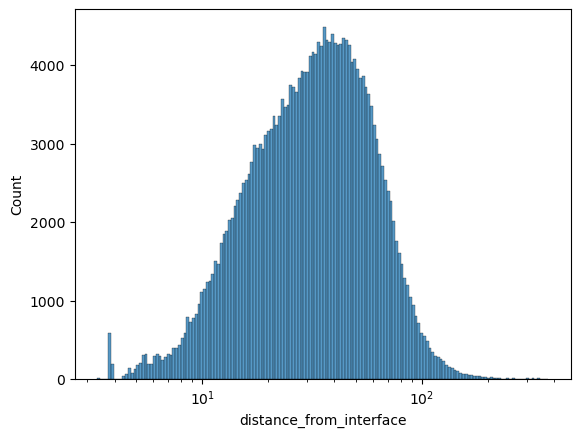

In [11]:
sns.histplot(data=interfaces_not_inside, x="distance_from_interface", log_scale=True)
plt.savefig("plots/interfaces_dist.png")

# Pockets

In [12]:
pockets_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/results/merged_pockets_FINAL.csv")
pockets_data

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_pocket,inside_pocket,distance_from_pocket
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,2,0,22.103256
1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,...,P31946,SER,6.0,NaN,undefined,6.0,P31946,10,0,18.407673
2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,28.08,...,P31946,TYR,21.0,11.100927,protonated,21.0,P31946,",2,15",1,0.000000
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,10,0,12.921682
4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,28.08,...,P31946,SER,39.0,NaN,undefined,39.0,P31946,",10",1,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,1,0,22.441628
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,4,0,26.709694
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,4,0,29.435677
436010,435129,435262,PRG2,PRG2,P13727,11q12.1,T25-ga,27914784,human,25.21,...,P13727,THR,25.0,NaN,undefined,25.0,P13727,4,0,30.474608


In [13]:
pockets_data.shape
# there are 436012 rows, as expected

(436012, 29)

In [14]:
rows_with_no_data = sum(np.isnan(pockets_data["distance_from_pocket"]))
print("there are ", rows_with_no_data, " rows that didn't have any pocket data/evaluation")
print(rows_with_no_data/pockets_data.shape[0], "of the rows have no pocket data")

there are  95464  rows that didn't have any pocket data/evaluation
0.218948102345807 of the rows have no pocket data


In [15]:
inside_pocket =  pockets_data[pockets_data['inside_pocket'] == 1]
print("there are ",inside_pocket.shape[0], "psp's inside pockets")
print(inside_pocket.shape[0]/pockets_data.shape[0], "of the psp's are inside an pocket")

there are  162921 psp's inside pockets
0.37366173408071335 of the psp's are inside an pocket


### Distance Analysis

In [16]:
# distance avg's and distribution
pockets_not_inside = pockets_data[pockets_data['inside_pocket'] == 0 & pd.notna(pockets_data['distance_from_pocket'])] # isolate to all that are not inside an interface but also have interface data!
pockets_not_inside

,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,MW_kD,...,uniprotID,AA,res_number,pK,state,position,uniprot_id,closest_pocket,inside_pocket,distance_from_pocket
0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,28.08,...,P31946,THR,2.0,NaN,undefined,2.0,P31946,2,0,22.103256
1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,28.08,...,P31946,SER,6.0,NaN,undefined,6.0,P31946,10,0,18.407673
3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,28.08,...,P31946,THR,32.0,NaN,undefined,32.0,P31946,10,0,12.921682
7,7,7,YWHAB,14-3-3 beta,P31946,20q13.12,S59-p,4935095,human,28.08,...,P31946,SER,59.0,NaN,undefined,59.0,P31946,15,0,12.708703
8,8,8,YWHAB,14-3-3 beta,P31946,20q13.12,S60-p,450226,human,28.08,...,P31946,SER,60.0,NaN,undefined,60.0,P31946,12,0,12.805052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436006,435124,435257,PRAP1,PRAP1,Q96NZ9,10q26.3,S111-ga,27914386,human,17.21,...,Q96NZ9,SER,111.0,NaN,undefined,111.0,Q96NZ9,1,0,21.256724
436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,17.21,...,Q96NZ9,TYR,113.0,9.888425,protonated,113.0,Q96NZ9,1,0,22.441628
436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,25.21,...,P13727,THR,23.0,NaN,undefined,23.0,P13727,4,0,26.709694
436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,25.21,...,P13727,SER,24.0,NaN,undefined,24.0,P13727,4,0,29.435677


In [17]:
pockets_not_inside_percent = pockets_not_inside.shape[0]/pockets_data.shape[0]
print(pockets_not_inside_percent, "of the data isn't inside of a pocket and has a distance calculated for the closest pocket")

0.6263382659192867 of the data isn't inside of a pocket and has a distance calculated for the closest pocket


In [18]:
avg_dist = pockets_not_inside['distance_from_pocket'].mean()
print("ther average distance from closest interface is:", avg_dist, "A")
max_dist = pockets_not_inside['distance_from_pocket'].max()
print("the max distance from closest interface is:", max_dist, "A")
min_dist = pockets_not_inside['distance_from_pocket'].min()
print("the min distance from closest interface is:", min_dist, "A")

ther average distance from closest interface is: 28.32592413779943 A
the max distance from closest interface is: 408.52082593236526 A
the min distance from closest interface is: 5.411421618154573 A


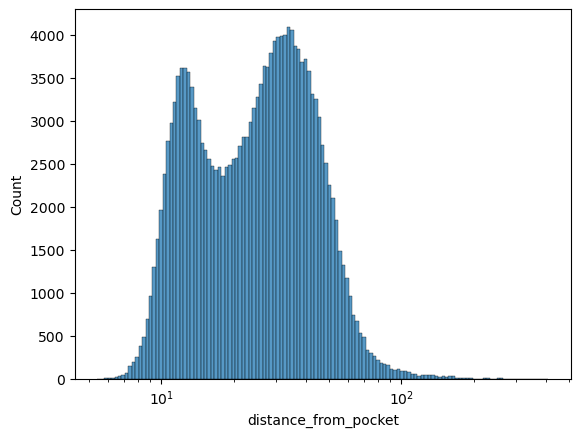

In [19]:
sns.histplot(data=pockets_not_inside, x="distance_from_pocket", log_scale=True)
plt.savefig("plots/pockets_dist.png")

# Stability Data

In [20]:
stability_data = pd.read_csv("/people/imal967/git_repos/pheno_analysis/results/merged_stability_FINAL.csv")
stability_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,pK,state,position,uniprot_id,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median,uniqueID
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,NaN,undefined,2.0,P31946,74.30,-0.700058,0.130120,0.700058,0.096524,0
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,NaN,undefined,6.0,P31946,95.62,-0.688997,0.643053,0.688997,0.278294,1
2,2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,...,11.100927,protonated,21.0,P31946,98.43,0.250080,3.602560,3.602560,2.686420,2
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,NaN,undefined,32.0,P31946,98.24,-2.085020,19.898600,19.898600,3.844370,3
4,4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,...,NaN,undefined,39.0,P31946,97.05,-1.610100,2.446650,2.446650,1.516780,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,232,297998,298115,SFN,14-3-3 sigma,P31947,1p36.11,K109-ub,15383715,human,...,10.921604,protonated,109.0,P31947,90.93,0.031068,2.672470,2.672470,1.468750,298115
436008,233,297999,298116,SFN,14-3-3 sigma,P31947,1p36.11,K122-ub,3933061,human,...,11.556411,protonated,122.0,P31947,98.63,-1.133220,6.299070,6.299070,1.714390,298116
436009,234,298000,298117,SFN,14-3-3 sigma,P31947,1p36.11,K124-ub,12381735,human,...,12.626807,protonated,124.0,P31947,98.79,-1.096620,7.020750,7.020750,1.466750,298117
436010,235,298001,298118,SFN,14-3-3 sigma,P31947,1p36.11,K140-ub,964495106,human,...,11.151598,protonated,140.0,P31947,93.77,0.570958,4.145290,4.145290,1.664520,298118


In [21]:
len(stability_data['uniprotID'].unique())

17941

In [22]:
len(pockets_data['uniprotID'].unique())

17941

In [23]:
stability_data.shape

(436012, 33)

In [24]:
rows_with_no_data = sum(np.isnan(stability_data["plddt"]))
print("there are ", rows_with_no_data, " rows that didn't have any interaction data/evaluation")
print(rows_with_no_data/stability_data.shape[0], "of the rows have no interaction data")

there are  178579  rows that didn't have any interaction data/evaluation
0.4095735897177142 of the rows have no interaction data


### plddt

In [25]:
avg_plddt = stability_data["plddt"].mean()
median_plddt = stability_data['plddt'].median()
print("the average plddt is:", avg_plddt)
print("the median plddt is:", median_plddt)

the average plddt is: 81.52060520601479
the median plddt is: 88.26


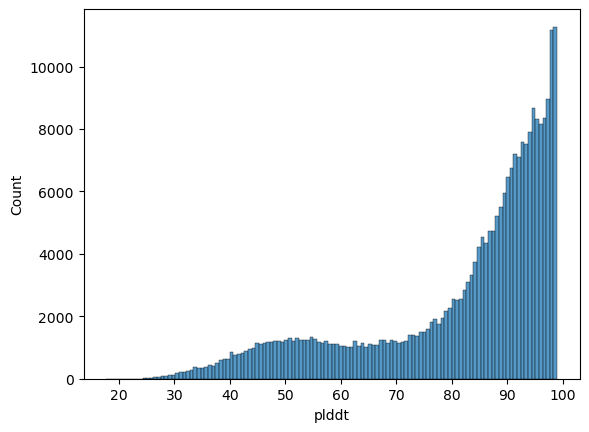

In [26]:
sns.histplot(data=stability_data, x="plddt")
plt.savefig("plots/plddt_distribution.png")

### foldx ddg

In [27]:
### MAXIMUM FOLDX DDG ###
max_foldx_ddg = stability_data['foldx_ddg_max'].max()
avg_max = stability_data['foldx_ddg_max'].mean()
median_max = stability_data['foldx_ddg_max'].median()
print("the max foldx_ddg is", max_foldx_ddg)
print("the avg max foldx_ddg is", avg_max)
print("the median max foldx_ddg is", median_max)

the max foldx_ddg is 89.1702
the avg max foldx_ddg is 4.895279766082882
the median max foldx_ddg is 2.92225


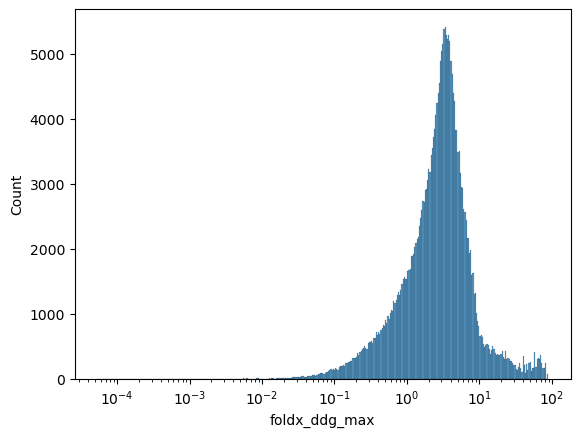

In [28]:
sns.histplot(data=stability_data, x="foldx_ddg_max", log_scale=True)
plt.savefig("plots/foldx_ddg_max_distribution.png")

In [29]:
### MINIMUM FOLDX DDG ###
min_foldx_ddg = stability_data['foldx_ddg_min'].min()
avg_min = stability_data['foldx_ddg_min'].mean()
median_min = stability_data['foldx_ddg_min'].median()
print("the min foldx_ddg is", min_foldx_ddg)
print("the avg min foldx_ddg is", avg_min)
print("the median min foldx_ddg is", median_min)

the min foldx_ddg is -24.6796
the avg min foldx_ddg is -0.8169363479259419
the median min foldx_ddg is -0.672928


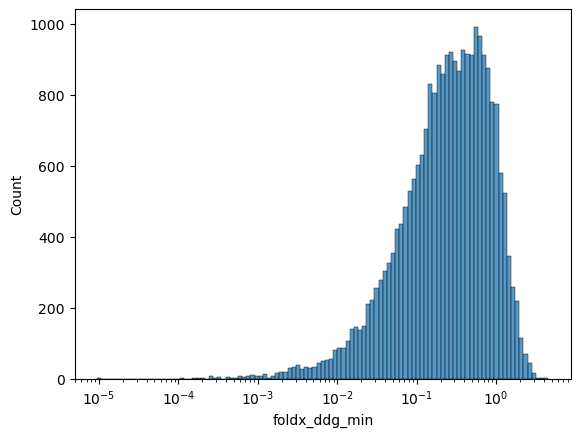

In [30]:
sns.histplot(data=stability_data, x="foldx_ddg_min", log_scale=True)
plt.savefig("plots/foldx_ddg_min_distribution.png")

In [31]:
### ABSOLUTE MAX FOLDX DDG ###
MIN_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].min()
MAX_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].max()
AVG_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].mean()
MED_abs_max_foldx_ddg = stability_data['foldx_ddg_abs_max'].median()
print("the MIN absolute max foldx_ddg is", MIN_abs_max_foldx_ddg)
print("the MAX absolute max foldx_ddg is", MAX_abs_max_foldx_ddg)
print("the AVG absolute max foldx_ddg is", AVG_abs_max_foldx_ddg)
print("the MEDIAN absolute max foldx_ddg is", MED_abs_max_foldx_ddg)

the MIN absolute max foldx_ddg is 0.0487825
the MAX absolute max foldx_ddg is 89.1702
the AVG absolute max foldx_ddg is 5.027286206475469
the MEDIAN absolute max foldx_ddg is 2.95683


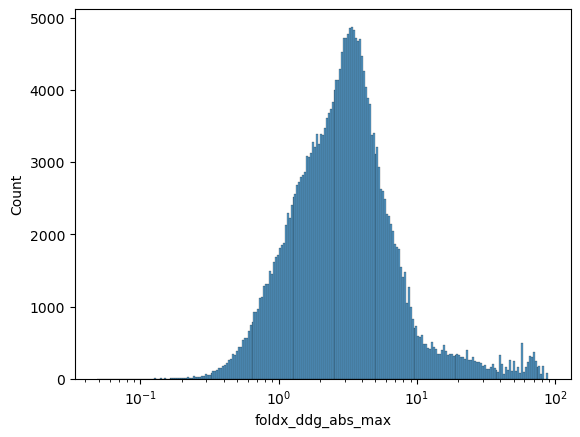

In [32]:
sns.histplot(data=stability_data, x="foldx_ddg_abs_max", log_scale=True)
plt.savefig("plots/foldx_ddg_abs_max_distribution.png")

In [33]:
### ABSOLUTE MEDIAN FOLDX DDG ###
MIN_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].min()
MAX_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].max()
AVG_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].mean()
MED_abs_median_foldx_ddg = stability_data['foldx_ddg_abs_median'].median()
print("the MIN absolute median foldx_ddg is", MIN_abs_max_foldx_ddg)
print("the MAX absolute median foldx_ddg is", MAX_abs_max_foldx_ddg)
print("the AVG absolute median foldx_ddg is", AVG_abs_max_foldx_ddg)
print("the MEDIAN absolute median foldx_ddg is", MED_abs_max_foldx_ddg)

the MIN absolute median foldx_ddg is 0.0487825
the MAX absolute median foldx_ddg is 89.1702
the AVG absolute median foldx_ddg is 5.027286206475469
the MEDIAN absolute median foldx_ddg is 2.95683


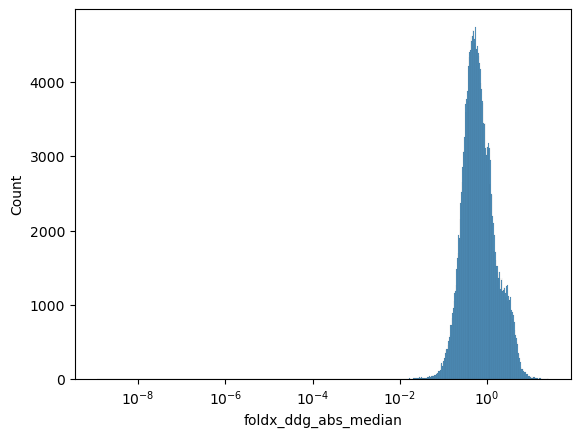

In [34]:
sns.histplot(data=stability_data, x="foldx_ddg_abs_median", log_scale=True)
plt.savefig("plots/foldx_ddg_abs_median_distribution.png")

## Types of PTM's Analysis

In [35]:
stability_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,pK,state,position,uniprot_id,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median,uniqueID
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,NaN,undefined,2.0,P31946,74.30,-0.700058,0.130120,0.700058,0.096524,0
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,NaN,undefined,6.0,P31946,95.62,-0.688997,0.643053,0.688997,0.278294,1
2,2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,...,11.100927,protonated,21.0,P31946,98.43,0.250080,3.602560,3.602560,2.686420,2
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,NaN,undefined,32.0,P31946,98.24,-2.085020,19.898600,19.898600,3.844370,3
4,4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,...,NaN,undefined,39.0,P31946,97.05,-1.610100,2.446650,2.446650,1.516780,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,232,297998,298115,SFN,14-3-3 sigma,P31947,1p36.11,K109-ub,15383715,human,...,10.921604,protonated,109.0,P31947,90.93,0.031068,2.672470,2.672470,1.468750,298115
436008,233,297999,298116,SFN,14-3-3 sigma,P31947,1p36.11,K122-ub,3933061,human,...,11.556411,protonated,122.0,P31947,98.63,-1.133220,6.299070,6.299070,1.714390,298116
436009,234,298000,298117,SFN,14-3-3 sigma,P31947,1p36.11,K124-ub,12381735,human,...,12.626807,protonated,124.0,P31947,98.79,-1.096620,7.020750,7.020750,1.466750,298117
436010,235,298001,298118,SFN,14-3-3 sigma,P31947,1p36.11,K140-ub,964495106,human,...,11.151598,protonated,140.0,P31947,93.77,0.570958,4.145290,4.145290,1.664520,298118


In [36]:
stability_data[['residue','ptm_type']] = stability_data['MOD_RSD'].str.split('-', expand = True)

In [37]:
stability_data['ptm_type'].unique()

array(['p', 'ac', 'ub', 'm1', 'm2', 'me', 'sm', 'm3', 'ga', 'gl'],
      dtype=object)

In [38]:
stability_data['ptm_type'].value_counts()

ptm_type
p     272398
ub    107588
ac     25537
m1     15159
sm      8888
ga      2994
m2      2298
gl       481
m3       394
me       275
Name: count, dtype: int64

In [39]:
stability_data['ptm_type'] = ['me' if t in ['m1', 'm2', 'm3'] else t for t in stability_data['ptm_type']]


In [40]:
stability_data['ptm_type'].value_counts()

ptm_type
p     272398
ub    107588
ac     25537
me     18126
sm      8888
ga      2994
gl       481
Name: count, dtype: int64

### Phosphorylation

In [41]:
### STABILITY ###
phos_stability_only = stability_data[stability_data['ptm_type'] == "p"]
phos_stability_only

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,position,uniprot_id,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median,uniqueID,residue,ptm_type
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,2.0,P31946,74.30,-0.700058,0.130120,0.700058,0.096524,0,T2,p
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,6.0,P31946,95.62,-0.688997,0.643053,0.688997,0.278294,1,S6,p
2,2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,...,21.0,P31946,98.43,0.250080,3.602560,3.602560,2.686420,2,Y21,p
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,32.0,P31946,98.24,-2.085020,19.898600,19.898600,3.844370,3,T32,p
4,4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,...,39.0,P31946,97.05,-1.610100,2.446650,2.446650,1.516780,4,S39,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435988,213,113,113,SFN,14-3-3 sigma,P31947,1p36.11,T207-p,56654093,human,...,207.0,P31947,88.98,-0.680508,3.149140,3.149140,0.231004,113,T207,p
435989,214,114,114,SFN,14-3-3 sigma,P31947,1p36.11,S209-p,55371904,human,...,209.0,P31947,89.19,-0.848995,1.847070,1.847070,0.838093,114,S209,p
435990,215,115,115,SFN,14-3-3 sigma,P31947,1p36.11,S216-p,455249,human,...,216.0,P31947,96.54,-0.919986,17.081700,17.081700,3.730310,115,S216,p
435991,216,116,116,SFN,14-3-3 sigma,P31947,1p36.11,T217-p,25239113,human,...,217.0,P31947,96.57,-1.548020,2.610870,2.610870,0.588979,116,T217,p


In [42]:
phos_avg_plddt = phos_stability_only["plddt"].mean()
phos_median_plddt = phos_stability_only['plddt'].median()
print("the average plddt for phosphorylation is:",phos_median_plddt, "the average overall is", avg_plddt)
print("the median plddt for phosphorylation is:", phos_median_plddt, "the median overall is", median_plddt)

the average plddt for phosphorylation is: 86.44 the average overall is 81.52060520601479
the median plddt for phosphorylation is: 86.44 the median overall is 88.26


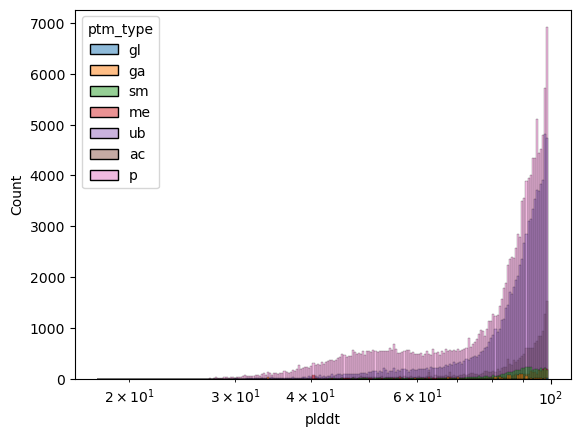

In [43]:
sns.histplot(data=stability_data, x="plddt", log_scale=True, hue='ptm_type', hue_order=['gl', 'ga','sm','me','ub','ac','p'])
plt.savefig("plots/plddt_ptm.png")

In [44]:
### ABSOLUTE MAX FOLDX DDG ###
MIN_phos_abs_max_foldx_ddg = phos_stability_only['foldx_ddg_abs_max'].min()
MAX_phos_abs_max_foldx_ddg = phos_stability_only['foldx_ddg_abs_max'].max()
AVG_phos_abs_max_foldx_ddg = phos_stability_only['foldx_ddg_abs_max'].mean()
MED_phos_abs_max_foldx_ddg = phos_stability_only['foldx_ddg_abs_max'].median()
print("the MIN absolute max foldx_ddg is", MIN_phos_abs_max_foldx_ddg)
print("the MAX absolute max foldx_ddg is", MAX_phos_abs_max_foldx_ddg)
print("the AVG absolute max foldx_ddg is", AVG_phos_abs_max_foldx_ddg)
print("the MEDIAN absolute max foldx_ddg is", MED_phos_abs_max_foldx_ddg)

the MIN absolute max foldx_ddg is 0.0487825
the MAX absolute max foldx_ddg is 89.1702
the AVG absolute max foldx_ddg is 6.1699084313833055
the MEDIAN absolute max foldx_ddg is 3.03503


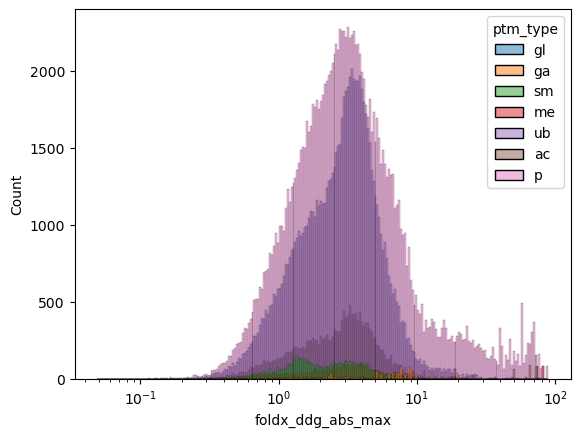

In [45]:
sns.histplot(data=stability_data, x="foldx_ddg_abs_max", log_scale=True, hue='ptm_type', hue_order=['gl', 'ga','sm','me','ub','ac','p'])
plt.savefig("plots/foldx_ddg_ptm.png")

In [46]:
full_data = pd.read_csv("/qfs/projects/proteometer/pheno_analysis/results/merged_interface_pocket_stability.csv")
full_data

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,distance_from_interface,uniqueID,closest_pocket,inside_pocket,distance_from_pocket,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,18.400596,0,2,0,22.103256,74.30,-0.700058,0.130120,0.700058,0.096524
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,0.000000,1,10,0,18.407673,95.62,-0.688997,0.643053,0.688997,0.278294
2,2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,...,0.000000,2,",2,15",1,0.000000,98.43,0.250080,3.602560,3.602560,2.686420
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,15.828202,3,10,0,12.921682,98.24,-2.085020,19.898600,19.898600,3.844370
4,4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,...,16.123331,4,",10",1,0.000000,97.05,-1.610100,2.446650,2.446650,1.516780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,...,19.475904,435258,1,0,22.441628,87.73,-0.310755,0.859067,0.859067,0.516341
436008,436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,...,25.513050,435260,4,0,26.709694,39.53,-0.312937,0.381937,0.381937,0.134005
436009,436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,...,27.206643,435261,4,0,29.435677,45.31,-1.365570,0.171909,1.365570,0.471913
436010,436010,435129,435262,PRG2,PRG2,P13727,11q12.1,T25-ga,27914784,human,...,29.210871,435262,4,0,30.474608,40.84,-0.118950,0.782394,0.782394,0.100066


# Full Data Coorelations

In [47]:
full_data[['residue','ptm_type']] = full_data['MOD_RSD'].str.split('-', expand = True)
full_data['ptm_type'] = ['me' if t in ['m1', 'm2', 'm3'] else t for t in full_data['ptm_type']]

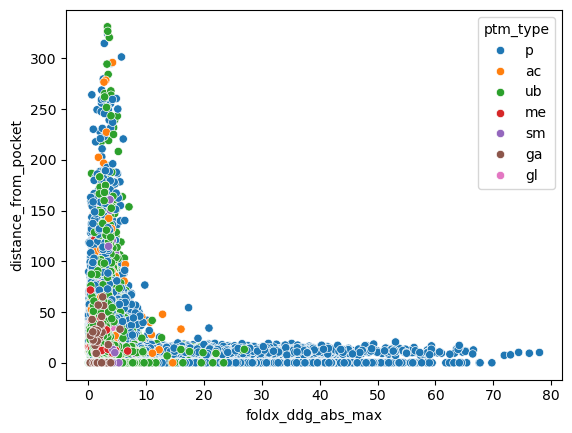

In [48]:
sns.scatterplot(data = full_data,  x = "foldx_ddg_abs_max", y = "distance_from_pocket", hue = "ptm_type")
plt.savefig("plots/foldx_ddg_pocket.png")

In [49]:
tmp = full_data[full_data['foldx_ddg_abs_max'].notnull() & full_data['distance_from_pocket'].notnull()]
correlation, p_value = stats.pearsonr(tmp['foldx_ddg_abs_max'], tmp['distance_from_pocket'])
print("the correlation coefficient is:", correlation)
print("the p-value is:", p_value)

the correlation coefficient is: -0.09220969437117431
the p-value is: 0.0


In [50]:
tmp = full_data[full_data['foldx_ddg_abs_max'].notnull() & full_data['distance_from_pocket'].notnull()]
tmp[tmp['distance_from_pocket']!= 0]['distance_from_pocket'].min()
tmp

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,closest_pocket,inside_pocket,distance_from_pocket,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median,residue,ptm_type
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,2,0,22.103256,74.30,-0.700058,0.130120,0.700058,0.096524,T2,p
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,10,0,18.407673,95.62,-0.688997,0.643053,0.688997,0.278294,S6,p
2,2,2,2,YWHAB,14-3-3 beta,P31946,20q13.12,Y21-p,3426383,human,...,",2,15",1,0.000000,98.43,0.250080,3.602560,3.602560,2.686420,Y21,p
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,10,0,12.921682,98.24,-2.085020,19.898600,19.898600,3.844370,T32,p
4,4,4,4,YWHAB,14-3-3 beta,P31946,20q13.12,S39-p,27442700,human,...,",10",1,0.000000,97.05,-1.610100,2.446650,2.446650,1.516780,S39,p
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436007,436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,...,1,0,22.441628,87.73,-0.310755,0.859067,0.859067,0.516341,Y113,ga
436008,436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,...,4,0,26.709694,39.53,-0.312937,0.381937,0.381937,0.134005,T23,ga
436009,436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,...,4,0,29.435677,45.31,-1.365570,0.171909,1.365570,0.471913,S24,ga
436010,436010,435129,435262,PRG2,PRG2,P13727,11q12.1,T25-ga,27914784,human,...,4,0,30.474608,40.84,-0.118950,0.782394,0.782394,0.100066,T25,ga


In [51]:

tmp2 = tmp[tmp['distance_from_pocket'] != 0].copy()
tmp2["inverse_dist_pocket"] = 1 / tmp2["distance_from_pocket"]
tmp2

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,GENE,PROTEIN,ACC_ID,HU_CHR_LOC,MOD_RSD,SITE_GRP_ID,ORGANISM,...,inside_pocket,distance_from_pocket,plddt,foldx_ddg_min,foldx_ddg_max,foldx_ddg_abs_max,foldx_ddg_abs_median,residue,ptm_type,inverse_dist_pocket
0,0,0,0,YWHAB,14-3-3 beta,P31946,20q13.12,T2-p,15718712,human,...,0,22.103256,74.30,-0.700058,0.130120,0.700058,0.096524,T2,p,0.045242
1,1,1,1,YWHAB,14-3-3 beta,P31946,20q13.12,S6-p,15718709,human,...,0,18.407673,95.62,-0.688997,0.643053,0.688997,0.278294,S6,p,0.054325
3,3,3,3,YWHAB,14-3-3 beta,P31946,20q13.12,T32-p,23077803,human,...,0,12.921682,98.24,-2.085020,19.898600,19.898600,3.844370,T32,p,0.077389
7,7,7,7,YWHAB,14-3-3 beta,P31946,20q13.12,S59-p,4935095,human,...,0,12.708703,98.12,-0.641476,3.564730,3.564730,0.280184,S59,p,0.078686
8,8,8,8,YWHAB,14-3-3 beta,P31946,20q13.12,S60-p,450226,human,...,0,12.805052,98.15,-2.040630,2.278820,2.278820,0.706567,S60,p,0.078094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436006,436006,435124,435257,PRAP1,PRAP1,Q96NZ9,10q26.3,S111-ga,27914386,human,...,0,21.256724,82.44,-1.545330,0.609311,1.545330,0.363159,S111,ga,0.047044
436007,436007,435125,435258,PRAP1,PRAP1,Q96NZ9,10q26.3,Y113-ga,27914389,human,...,0,22.441628,87.73,-0.310755,0.859067,0.859067,0.516341,Y113,ga,0.044560
436008,436008,435127,435260,PRG2,PRG2,P13727,11q12.1,T23-ga,27914778,human,...,0,26.709694,39.53,-0.312937,0.381937,0.381937,0.134005,T23,ga,0.037440
436009,436009,435128,435261,PRG2,PRG2,P13727,11q12.1,S24-ga,27914781,human,...,0,29.435677,45.31,-1.365570,0.171909,1.365570,0.471913,S24,ga,0.033972


In [52]:
tmp3 = tmp2[tmp2['foldx_ddg_abs_max'].notnull() & tmp2['inverse_dist_pocket'].notnull()]
correlation, p_value = stats.pearsonr(tmp3['foldx_ddg_abs_max'], tmp3['inverse_dist_pocket'])
print("the correlation coefficient is:", correlation)
print("the p-value is:", p_value)

the correlation coefficient is: 0.24159696051327348
the p-value is: 0.0


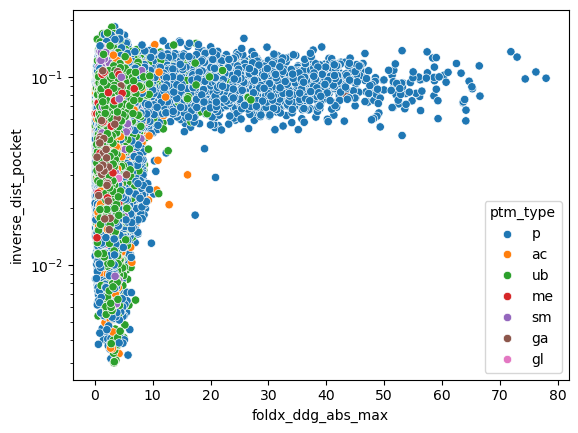

In [53]:
sns.scatterplot(data = tmp2,  x = "foldx_ddg_abs_max", y = "inverse_dist_pocket", hue = "ptm_type")
plt.yscale('log')
plt.savefig("plots/foldx_ddg_pocket_INVERSE.png")

In [54]:
result = stats.linregress(tmp['foldx_ddg_abs_max'], tmp['distance_from_pocket'])
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)


-0.33164809411849594
9.524425570868017
-0.09220969437116035
0.0
0.007545588196194619


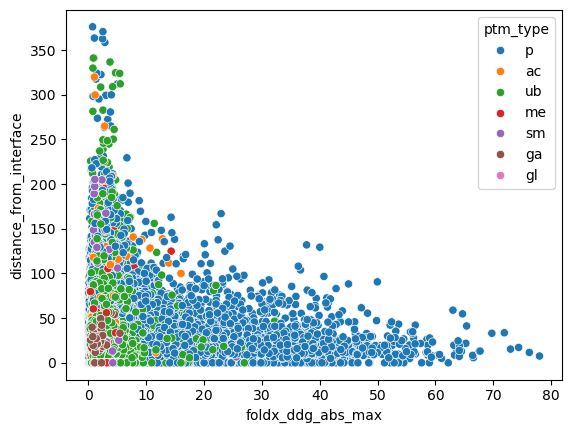

In [55]:
sns.scatterplot(data = full_data,  x = "foldx_ddg_abs_max", y = "distance_from_interface", hue = "ptm_type")
plt.savefig("plots/foldx_ddg_interface.png")

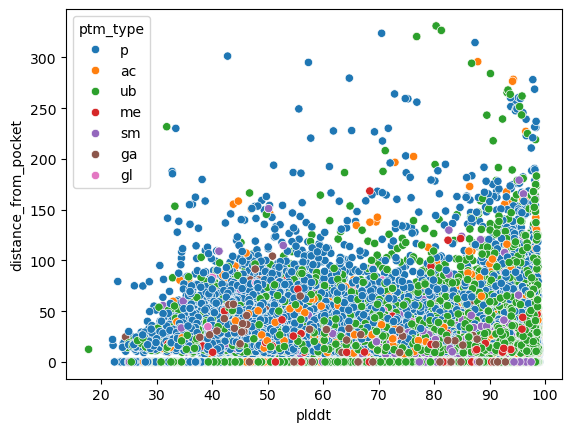

In [56]:
sns.scatterplot(data = full_data,  x = "plddt", y = "distance_from_pocket", hue = "ptm_type")
plt.savefig("plots/plddt_pocket.png")

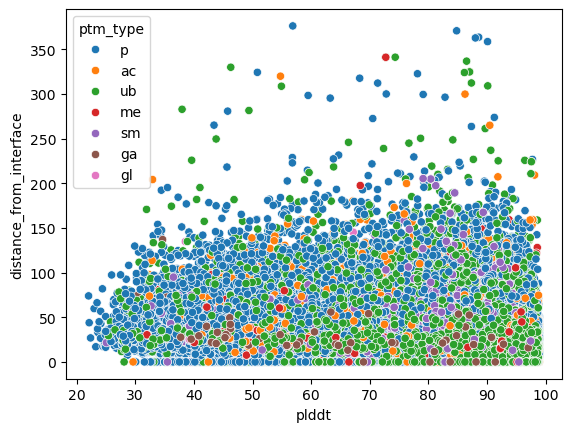

In [57]:
sns.scatterplot(data = full_data,  x = "plddt", y = "distance_from_interface", hue = "ptm_type")
plt.savefig("plots/plddt_interface.png")

## Correlation of being inside a pocket/interface and pKa

the average pk for ptms outside of a pocket is: 9.405732718291347
the average pk for ptms inside of a pocket is: 10.91328833622582


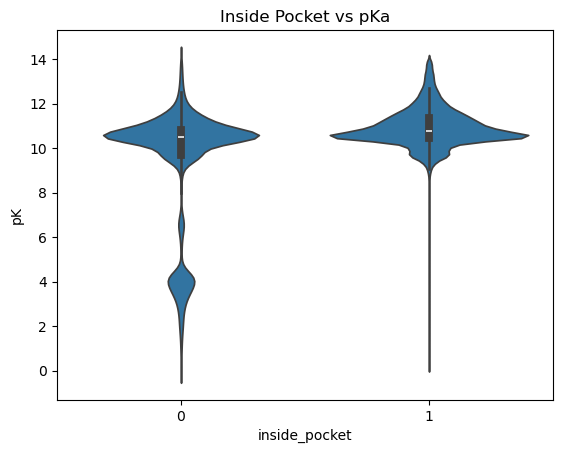

In [58]:
sns.violinplot(data=full_data, x="inside_pocket", y="pK").set_title("Inside Pocket vs pKa")
mean_pk_0_pocket = full_data[full_data['inside_pocket'] == 0]['pK'].mean()
mean_pk_1_pocket = full_data[full_data['inside_pocket'] == 1]['pK'].mean()
print("the average pk for ptms outside of a pocket is:", mean_pk_0_pocket)
print("the average pk for ptms inside of a pocket is:", mean_pk_1_pocket)
plt.savefig("plots/pka_pocket.png")

In [59]:
tmp = full_data[full_data['inside_pocket'].notnull() & full_data['pK'].notnull()]
correlation, p_value = stats.pearsonr(tmp['inside_pocket'], tmp['pK'])
print("the correlation coefficient is:", correlation)
print("the p-value is:", p_value)

the correlation coefficient is: 0.3475508137716802
the p-value is: 0.0


In [60]:
result = stats.linregress(tmp['inside_pocket'], tmp['pK'])
print(result.slope)
print(result.intercept)
print(result.rvalue)
print(result.pvalue)
print(result.stderr)

1.5075556179348708
9.405732718291146
0.34755081377173863
0.0
0.009336836727996192


the average pk for ptms outside of a pocket is: 10.04349286462611
the average pk for ptms inside of a pocket is: 10.749120615475713


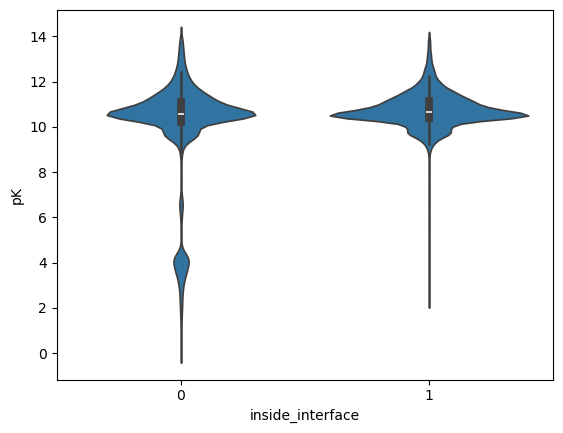

In [61]:
sns.violinplot(data=full_data, x="inside_interface", y="pK")
mean_pk_0_interface = full_data[full_data['inside_interface'] == 0]['pK'].mean()
mean_pk_1_interface = full_data[full_data['inside_interface'] == 1]['pK'].mean()
print("the average pk for ptms outside of a pocket is:", mean_pk_0_interface)
print("the average pk for ptms inside of a pocket is:", mean_pk_1_interface)
plt.savefig("plots/pka_interface.png")

In [62]:
tmp = full_data[full_data['inside_interface'].notnull() & full_data['pK'].notnull()]
correlation, p_value = stats.pearsonr(tmp['inside_interface'], tmp['pK'])
print("the correlation coefficient is:", correlation)
print("the p-value is:", p_value)

the correlation coefficient is: 0.12219658010284654
the p-value is: 0.0


## Correlation of being inside a pocket/interface and pKa

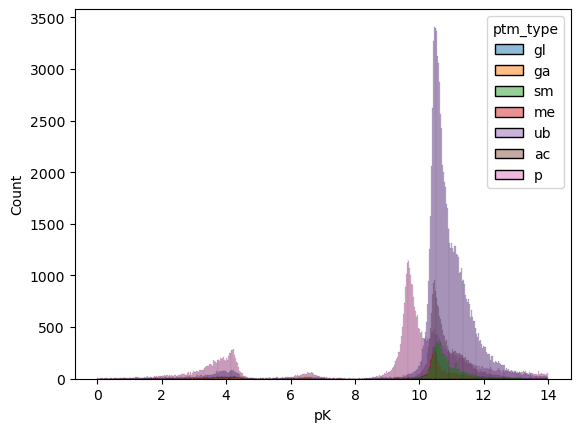

In [63]:
sns.histplot(data=full_data, x="pK", hue='ptm_type', hue_order=['gl', 'ga','sm','me','ub','ac','p'])
plt.savefig("plots/pka_ptm.png")

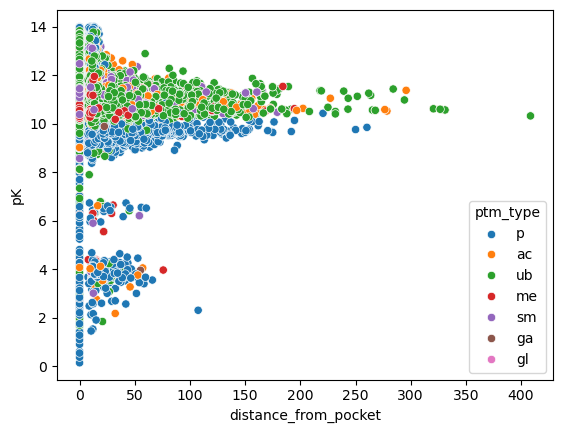

In [64]:
sns.scatterplot(data = full_data,  x = "distance_from_pocket", y = "pK", hue = "ptm_type")
plt.savefig("plots/pka_pocket_dist.png")

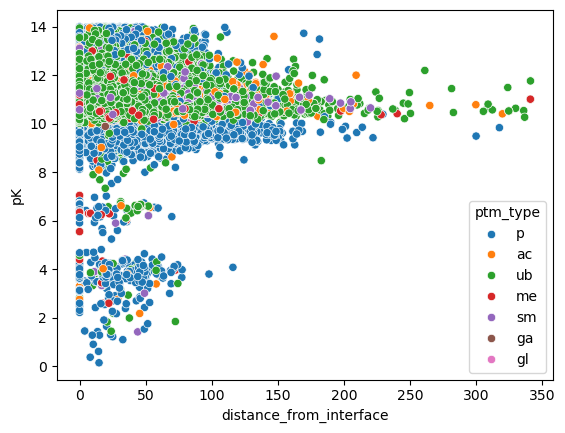

In [65]:
sns.scatterplot(data = full_data, x = "distance_from_interface", y = "pK", hue = "ptm_type")
plt.savefig("plots/pka_interface_dist.png")

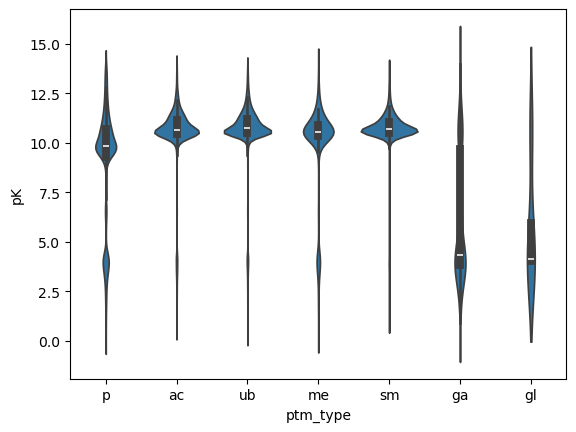

In [66]:
sns.violinplot(data=full_data, x="ptm_type", y="pK")
plt.savefig("plots/pka_ptm.png")


In [67]:
tmp = full_data[full_data['ptm_type'].notnull() & full_data['pK'].notnull()]
p = tmp[tmp['ptm_type'] == "p"]['pK']
ac = tmp[tmp['ptm_type'] == "ac"]['pK']
ub = tmp[tmp['ptm_type'] == "ub"]['pK']
me = tmp[tmp['ptm_type'] == "me"]['pK']
sm = tmp[tmp['ptm_type'] == "sm"]['pK']
ga = tmp[tmp['ptm_type'] == "ga"]['pK']
gl = tmp[tmp['ptm_type'] == "gl"]['pK']
F, pval = stats.f_oneway(p, ac, ub, me, sm, ga, gl)
print(F)
print(pval)


4160.681276194141
0.0


In [68]:
print("the mean pKa for p is:", p.mean())
print("the mean pKa for ac is:", ac.mean())
print("the mean pKa for ub is:", ub.mean())
print("the mean pKa for me is:", me.mean())
print("the mean pKa for sm is:", sm.mean())
print("the mean pKa for ga is:", ga.mean())
print("the mean pKa for gl is:", gl.mean())

the mean pKa for p is: 9.045237588050092
the mean pKa for ac is: 10.556521651784353
the mean pKa for ub is: 10.662086945116197
the mean pKa for me is: 9.902969392363953
the mean pKa for sm is: 10.718908011505423
the mean pKa for ga is: 6.030553421724724
the mean pKa for gl is: 5.754714731671745
